In [3]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN

In [4]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(4,5))) # 3 Neurons, max timestamps = 4, and input_features = 5
model.add(Dense(1, activation='sigmoid')) # 1 Neuron, 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 27        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
print(model.get_weights()[0].shape) # input_features = 5 * 3 Neurons = 15
# model.get_weights()[0].shape
print(model.get_weights()[0])
# model.get_weights()[0]

(5, 3)
[[-0.32522345  0.6686043  -0.80752623]
 [-0.7242861  -0.01266134 -0.30286866]
 [-0.803253   -0.3517964  -0.3300916 ]
 [-0.13721216 -0.21620631 -0.5987021 ]
 [ 0.13036746  0.52350646 -0.10331446]]


In [6]:
print(model.get_weights()[1].shape)
model.get_weights()[1]

(3, 3)


array([[ 0.5920876 ,  0.4892791 ,  0.64034235],
       [ 0.3958864 ,  0.5155104 , -0.75994945],
       [-0.7019304 ,  0.7034595 ,  0.11152825]], dtype=float32)

In [7]:
print(model.get_weights()[2].shape) # Biases for first 3 Neurons
model.get_weights()[2]

(3,)


array([0., 0., 0.], dtype=float32)

In [8]:
print(model.get_weights()[3].shape) # Weights for first 3 Neurons connected with last / next neuron
model.get_weights()[3]

(3, 1)


array([[-0.43944597],
       [ 0.78731024],
       [ 0.6463095 ]], dtype=float32)

In [9]:
print(model.get_weights()[4].shape) # 1 Bias for last neuron
model.get_weights()[4]

(1,)


array([0.], dtype=float32)

**Integer Encoding Simple RNN**

In [10]:
doc = [
    'Jiye Bhutto',
    'Pakistan Zindabad',
    'Prime Minister of Pakistan Imran Khan',
    'Pakistan Cricket Board',
    'Imran Khan a great Cricket player',
    'Bhutto met with Imran Khan',
    'Cricket lovers',
    'Cricket as a national sports of Pakistan',
    'Imran Khan raise a voice to change the chairman of Pakistan Cricket Board',
    'Imran Khan historical speech at Pakistan Cricket Academy',
]

# First step to do is tokenize, means removing special character, changing cases lower to upper or upper to lower
# removing stopwords, etc...

In [11]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token=(',')) # Out of Vocabulary Token

In [12]:
tokenizer.fit_on_texts(doc)

In [13]:
tokenizer.word_index

{',': 1,
 'pakistan': 2,
 'cricket': 3,
 'imran': 4,
 'khan': 5,
 'of': 6,
 'a': 7,
 'bhutto': 8,
 'board': 9,
 'jiye': 10,
 'zindabad': 11,
 'prime': 12,
 'minister': 13,
 'great': 14,
 'player': 15,
 'met': 16,
 'with': 17,
 'lovers': 18,
 'as': 19,
 'national': 20,
 'sports': 21,
 'raise': 22,
 'voice': 23,
 'to': 24,
 'change': 25,
 'the': 26,
 'chairman': 27,
 'historical': 28,
 'speech': 29,
 'at': 30,
 'academy': 31}

In [14]:
tokenizer.word_counts # Frequency Count

OrderedDict([('jiye', 1),
             ('bhutto', 2),
             ('pakistan', 6),
             ('zindabad', 1),
             ('prime', 1),
             ('minister', 1),
             ('of', 3),
             ('imran', 5),
             ('khan', 5),
             ('cricket', 6),
             ('board', 2),
             ('a', 3),
             ('great', 1),
             ('player', 1),
             ('met', 1),
             ('with', 1),
             ('lovers', 1),
             ('as', 1),
             ('national', 1),
             ('sports', 1),
             ('raise', 1),
             ('voice', 1),
             ('to', 1),
             ('change', 1),
             ('the', 1),
             ('chairman', 1),
             ('historical', 1),
             ('speech', 1),
             ('at', 1),
             ('academy', 1)])

In [15]:
tokenizer.document_count # How many sentences in my document

10

In [16]:
sequences = tokenizer.texts_to_sequences(doc) # Sentence to sequence
sequences

[[10, 8],
 [2, 11],
 [12, 13, 6, 2, 4, 5],
 [2, 3, 9],
 [4, 5, 7, 14, 3, 15],
 [8, 16, 17, 4, 5],
 [3, 18],
 [3, 19, 7, 20, 21, 6, 2],
 [4, 5, 22, 7, 23, 24, 25, 26, 27, 6, 2, 3, 9],
 [4, 5, 28, 29, 30, 2, 3, 31]]

In [17]:
from keras.utils import pad_sequences

In [18]:
padded_sequences = pad_sequences(sequences, padding='post') # Text converted to vectors or numbers
padded_sequences 

array([[10,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12, 13,  6,  2,  4,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  5,  7, 14,  3, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 8, 16, 17,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3, 19,  7, 20, 21,  6,  2,  0,  0,  0,  0,  0,  0],
       [ 4,  5, 22,  7, 23, 24, 25, 26, 27,  6,  2,  3,  9],
       [ 4,  5, 28, 29, 30,  2,  3, 31,  0,  0,  0,  0,  0]])

In [19]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, Flatten, Embedding, SimpleRNN

In [20]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [21]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [22]:
print(len(X_train[0]), len(X_train[1]), len(X_train[2]), len(X_train[3]))

218 189 141 550


In [23]:
X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32])

In [24]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(50, 1))) # 50 = timestamps/maxlength, 1 input feature
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/5


1563/1563 [==============================] - 14s 8ms/step - loss: 0.6947 - accuracy: 0.5042 - val_loss: 0.6938 - val_accuracy: 0.5050
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6937 - accuracy: 0.5081 - val_loss: 0.6940 - val_accuracy: 0.5067
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6939 - accuracy: 0.5045 - val_loss: 0.6936 - val_accuracy: 0.5081
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6947 - val_accuracy: 0.5019
Epoch 5/5
1563/1563 [==============================] - 20s 12ms/step - loss: 0.6933 - accuracy: 0.5064 - val_loss: 0.6961 - val_accuracy: 0.5008


In [26]:
import matplotlib.pyplot as plt

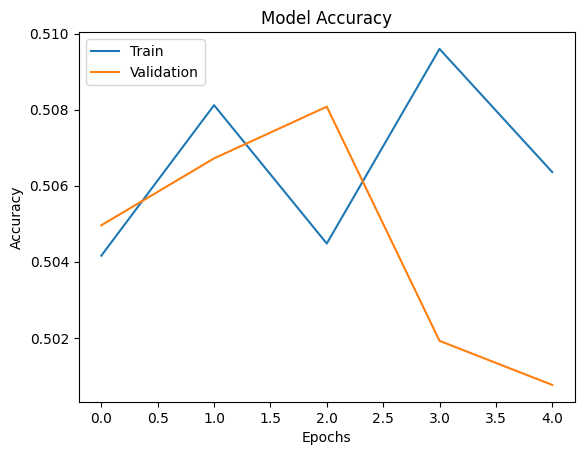

In [27]:
# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

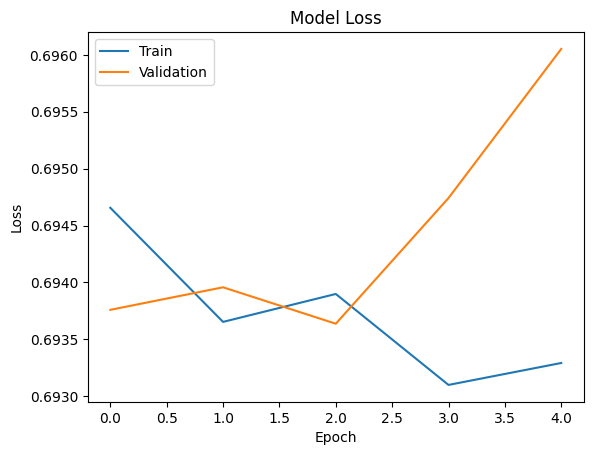

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Embeddings**

In [ ]:
# In natural language processing, word embedding is a term used for the representation of words for text analysis, 
# typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are
# closer in the vector space are expected to be similar in meaning. There are different types of embeddings techniques
# such as Word2Vec, Glove, FastText, etc... and we also can train our own embeddings using Keras Embedding Layer

In [29]:
doc = [
    'Jiye Bhutto',
    'Pakistan Zindabad',
    'Prime Minister of Pakistan Imran Khan',
    'Pakistan Cricket Board',
    'Imran Khan a great Cricket player',
    'Bhutto met with Imran Khan',
    'Cricket lovers',
    'Cricket as a national sports of Pakistan',
    'Imran Khan raise a voice to change the chairman of Pakistan Cricket Board',
    'Imran Khan historical speech at Pakistan Cricket Academy',
]

In [30]:
from keras.preprocessing.text import Tokenizer

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(doc)
print(len(tokenizer.word_index))
tokenizer.word_index

30


{'pakistan': 1,
 'cricket': 2,
 'imran': 3,
 'khan': 4,
 'of': 5,
 'a': 6,
 'bhutto': 7,
 'board': 8,
 'jiye': 9,
 'zindabad': 10,
 'prime': 11,
 'minister': 12,
 'great': 13,
 'player': 14,
 'met': 15,
 'with': 16,
 'lovers': 17,
 'as': 18,
 'national': 19,
 'sports': 20,
 'raise': 21,
 'voice': 22,
 'to': 23,
 'change': 24,
 'the': 25,
 'chairman': 26,
 'historical': 27,
 'speech': 28,
 'at': 29,
 'academy': 30}

In [47]:
sequences = tokenizer.texts_to_sequences(doc)
sequences

[[9, 7],
 [1, 10],
 [11, 12, 5, 1, 3, 4],
 [1, 2, 8],
 [3, 4, 6, 13, 2, 14],
 [7, 15, 16, 3, 4],
 [2, 17],
 [2, 18, 6, 19, 20, 5, 1],
 [3, 4, 21, 6, 22, 23, 24, 25, 26, 5, 1, 2, 8],
 [3, 4, 27, 28, 29, 1, 2, 30]]

In [48]:
from keras.utils import pad_sequences
padded_sequences = pad_sequences(sequences, padding='post')
padded_sequences

array([[ 9,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [11, 12,  5,  1,  3,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  4,  6, 13,  2, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 7, 15, 16,  3,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2, 18,  6, 19, 20,  5,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  4, 21,  6, 22, 23, 24, 25, 26,  5,  1,  2,  8],
       [ 3,  4, 27, 28, 29,  1,  2, 30,  0,  0,  0,  0,  0]])

In [54]:
len(padded_sequences[0])

13

In [72]:
# vocab_size = max([max(sequence) for sequence in padded_sequences])
# vocab_size

In [79]:
model = Sequential()
model.add(Embedding(input_dim=31, output_dim=2, input_length=13)) 
# input_dim = total vocab size, 
# output_dim = with how much max length i want to represent the word, for example
# [ 9,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], to get rid of sparcity, i want to represent 9 as 2 words as embeddings
# input_length = max length of a sentence after padded sequences
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 13, 2)             62        
                                                                 
Total params: 62 (248.00 Byte)
Trainable params: 62 (248.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile('adam', 'accuracy')

In [81]:
prediction = model.predict(padded_sequences)
prediction

1/1 [==============================] - 0s 43ms/step


array([[[-0.04779046,  0.01608511],
        [ 0.00221974,  0.03534919],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998]],

       [[-0.00329908, -0.03863255],
        [ 0.00071446, -0.03600176],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998],
        [ 0.04715792,  0.04832998]],

       [[-0.04884648, -0.04841029],
        [ 0.02753017, -0

In [82]:
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense, Flatten, Embedding, SimpleRNN

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [120]:
# (X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000) # if i want to bound my vocab size
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [121]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [122]:
X_train.shape

(25000, 50)

In [123]:
X_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32])

In [130]:
# X_train.shape
max_index_value = max([max(sequence) for sequence in X_train])
max_index_value

88585

In [131]:
model = Sequential()
model.add(Embedding(input_dim=max_index_value+1, output_dim=2, input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 50, 2)             177172    
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 32)                1120      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 178325 (696.58 KB)
Trainable params: 178325 (696.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 9s 10ms/step - loss: 0.6706 - accuracy: 0.5603 - val_loss: 0.5216 - val_accuracy: 0.7413
Epoch 2/5
782/782 [==============================] - 10s 12ms/step - loss: 0.4083 - accuracy: 0.8138 - val_loss: 0.4174 - val_accuracy: 0.8110
Epoch 3/5
782/782 [==============================] - 11s 15ms/step - loss: 0.2465 - accuracy: 0.9027 - val_loss: 0.4794 - val_accuracy: 0.7940
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1600 - accuracy: 0.9428 - val_loss: 0.5616 - val_accuracy: 0.7954
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.1051 - accuracy: 0.9644 - val_loss: 0.6477 - val_accuracy: 0.7828


In [133]:
import matplotlib.pyplot as plt

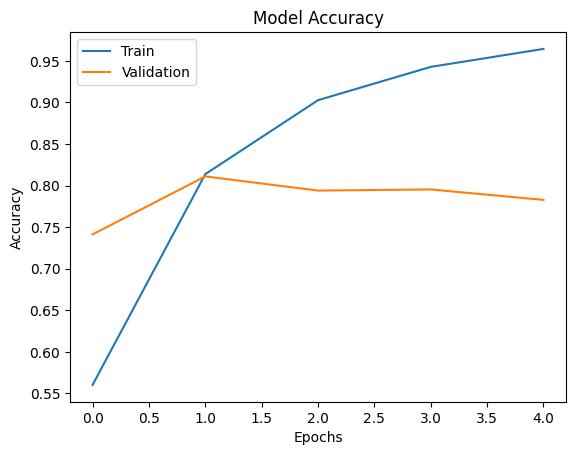

In [134]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

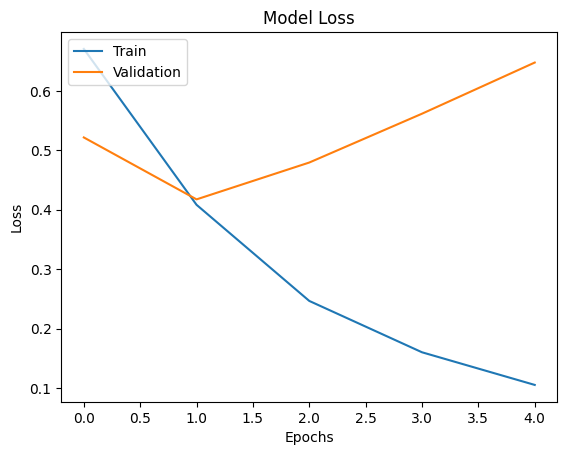

In [135]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()